# Tensorflow 와 keras

Tensorflow - 구글에서 만든 Framework

#Keras

고성능 딥러닝 라이브러리

구글에서 만든 프레임워크인 Tensorflow 안에서 Keras 동작

# Tensorflow가 있는데 Keras도 필요한 이유?

Tensorflow는 입문자에게는 상당히 고난이도

반면에, Keras는 사용자(개발자) 친화적으로 만들어져있어서, 상대적으로 사용이 간편함

단순한 신경망 구성 등 기존에 있는 것만으로 개발이 가능하다면 Keras만으로도 충분하지만...

디테일한 조종 등에는 한계가 있어서 Tensorflow로 함께 사용하면 조금 더 좋은 개발이 가능

In [ ]:
import tensorflow as tf

In [ ]:
# mnist 데이터 확보
mnist = tf.keras.datasets.mnist

In [ ]:
# 케라스를 이용해서 train_data, test_data 나누기
train_data, test_data = tf.keras.datasets.mnist.load_data()
# tf.keras.datasets.mnist.load_data() : 학습용 데이터, 테스트용 데이터를 각각 (feature, label) 형태로 반환 feature : train or test data, label : predict_data 
# 모델을 완성시키기 위해서 사용하는 data를 feature data라고 한다.(단순 회귀 모델 데이터 값 (x))
# 모델을 통해서 생성되는 결과 값이 label이라고 한다. (단순 회귀 모델 결과(y))

# 회귀(통계학에서 회귀 분석은 관찰된 연속형 변수들에 대해 두 변수 사이의 모형을 구한 뒤 적합도를 측정해 내는 분석 방법이다. 
#회귀분석은 시간에 따라 변화하는 데이터나 어떤 영향, 가설적 실험, 인과 관계의 모델링등의 통계적 예측에 이용될 수 있다.) 

#vs 

#분류 
# 통계적 분류는 데이터를 통계학 기법에 의해 분류하는 기계 학습의 과정이다.

(img_train, label_train) = train_data
(img_test, label_test) = test_data

# 데이터 확인
print(train_data)
print()
print(test_data)


11490434/11490434 [==============================] - 1s 0us/step
(array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
   

In [ ]:
print(img_train.shape)
print(label_train.shape)
print(img_test.shape)
print(label_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [ ]:
img = img_train[150]
img.shape

(28, 28)

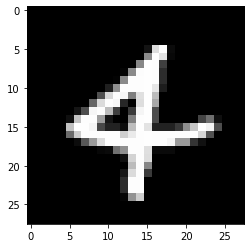

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(img, 'gray')
plt.show()

# 주요 용어

# 하이퍼파리미터(hyper-parameter)

머신러닝이나 딥러닝에서 훈련을 시킬 때

조금 더 나은 조건에 훈련할 수 있도록 

[사용자가 직접] 설정해주는 옵션 값

학습속도, 반복 횟수,... 등은 사용자가 직접 설정
<hr>

어떤 값을 어떻게 설정하는지에 따라서 그 모델의 성능이나 결과가 달라짐

사용자가 따로 건들지 않으면 자동적으로 default 값 적용


# 에포크(epoch)

반복 횟수 지정

데이터를 학습시키는 과정을 몇 번 반복해서 모델이 최적의 
가중치를 찾아낼 수 있도록 하는 방법


# 과소적합(underfitting) vs 과대적합(overfitting)

모델 학습에 있어서 데이터는 크게

학습용 데이터 / 테스트(예측)용 데이터로 구분

반복적으로 학습을 시키면 모델은 사람이 발견하기 어려운 패턴을 

발견하게 되어서 사람의 예측 성능보다 우월한 모델 생성이 가능

예측용 데이터가 학습시킨 모델과는 다른 데이터의 분포를 가지고 있거나, 학습 시킨 데이터가 한 쪽으로 치우친(편향된) 데이터라면...
    => 그 모델은 예측 성능이 현저하게 떨어지게 됨...
* 과소적합 : 모델이 충분히 학습을 하지 못한
    경우 -> 예측 성능 저하
* 과대적합 : 학습데이터를 지나치게 많이 반복학습을 시킨 경우

=> 이 두 문제를 최소화하면서 정확도를 높일 수 있도록 해야함!

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# mnist dataset 가져오기
from tensorflow.keras import datasets

mnist = datasets.mnist

In [ ]:
# train 용, test용 나누기

(train_data,train_label), (test_data,test_label) = mnist.load_data()

In [ ]:
train_data.shape

(60000, 28, 28)

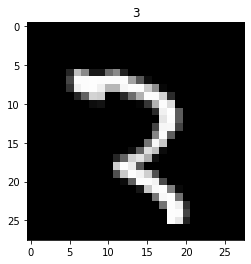

In [ ]:
# matplotlib으로
# 500번째에 있는 학습데이터의 data를 그림으로 출력 + 제목에는 그 그림에 해당하는 숫자
img = train_data[500]
plt.imshow(img, 'gray')
plt.title(train_label[500])
plt.show()

# 딥러닝 프로세스 (Deep Learning Process)

# 1. 데이터 로드

# 2. 데이터 전처리 (Data Preprocessing)

Data를 Model에 입력하기 전 데이터를 '가공'하는 단계

가지고 있는 데이터 종류, 모델에 적용하려는 훈련 방법 등에 따라서 전처리 방법은 천차만별!

경우에 따라서는 배열의 차원에 변경이 이루어지기도 하고, 스케일의 조정이 이루어지기도 함

데이터 전처리를 제대로 진행해야 다음에 나올 모델생성에서 올바르게 모델 정의를 할 수 있음

# 3. 데이터 분할(학습용, 테스트용)

# 4. 모델 생성

모델의 구조를 파악하고 만들어내는 단계
  * 모델 생성 방법
      * Sequentㅑal API : 순차적 구조의 모델
      * Functional API, Model Subclassing : 다중 입력, 출력을 가지고 있는 복잡한 구조의 모델

# 5. 모델 컴파일 (compile)
만들어진 모델 훈련에 사용할 다양한 옵션 설정

.compile() 함수를 사용
    * 손실함수(loss)
    * 옵티마이저(optimizer)
    * 평가지표(metrics)


# 6. 모델 훈련

.fit() 함수에 모델 훈련에 필요한 정보를 파라미터로 전달

  * 훈련 데이터 셋
  * 검증 데이터 셋
  * 배치(batch)
  * 크기
  * 콜백(call-back)

# 7. 모델 검증 (evaluate)

훈련이 끝난 모델이 얼마나 정확한지 검증하는 단계

모델 훈련시에 사용하지 않은 데이터셋을 모델에 입력시킨 후에, 

그 모델이 예측한 값과 정답을 비교해서 평가지표를 내림

이 검증결과를 바탕으로 모델 생성단계로 돌아가서 컴파일, 모델 수정 등이 이루어짐

목표한 성능에 도달할 때까지 계속 그 과정이 반복 (4번부터)

# 8. 예측 (predict)

test용 데이터를 입력해서 모델 예측값을 얻는 과정

# 2, 3, 4, 5번의 경우에는 모델 학습을 위한 필수
프로세스로 절대 빼먹어서는 안됨!


In [ ]:
#(train_data,train_label), (test_data,test_label)

In [ ]:
# 이미지 한장의 픽셀값의 최대, 최소값
# 정규화 하기 전
print(train_data.min()) # 최소값 : 0
print(train_data.max()) # 최대값 : 255 # 이유 : 흑백은 단일값 0~255 즉, 2차원 / 컬러는 단일값 0~255 3장 즉, 3장이 한 세트로 움직인다.

0
255


In [ ]:
# 이미지에 대한 내용을 정규화 0~1사이 값으로 변경
train_data, test_data = train_data / train_data.max(), test_data / train_data.max()

print(test_data.shape) # 10000개의 샘플 (28, 28)이미지 크기

# 정규화 한 후에 train_data의 배열

train_data[0, 5:10, 5:10] # 정규화 후의 데이터는 모두 0~1사이
# 정규화 : 데이터 값의 전체 범위를 0~1사이의 값으로 조정하는 것

(10000, 28, 28)


In [ ]:
# 모델 생성

# Sequential() : 수나적 구조의 모델 >> 구조를 설정하고 층(layer)을 설청하는 부분
# [] : 대괄호 안에 있는 부분이 layer!
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)), # 1차원(vector)으로 평평하게 만들기
    # input_shape 꼭 설정해야 함!
    # (28,28) 크기의 matrix가 들어갈테니 이걸 1차원 vector로 펴달라는 얘기
    tf.keras.layers.Dense(128, activation='relu'), # 은닉층(중간층)에 신경망을 만드는 단계
    # (128개 짜리 퍼셉트론으로 구성되는 layer 하나짜리)
    # activation = 'relu' : 은닉층의 활성화 함수
    tf.keras.layers.Dropout(0.2), # 과대적합을 막아주는 
    # 128개의 신경망 중에 무작위로 20%는 0으로 만들어줌
    tf.keras.layers.Dense(10, activation='softmax')
    # 10개의 퍼셉트론으로 만든 레이어
    # 10개의 값을 출력하는 이유 : 
    # 0 ~ 9까지 총 10개의 이미지가 어떤 숫자를 의미하는 지 파악하기 위해서
    # activation='softmax' : 마지막 층의 결과 값을 다중분류를 위한 확률값으로 계산할 수 있도록!

    # 활성화 함수(activation) : 결과값을 변환해서 다른층으로 보내주는 역할

    # 'linear' : 기본값, 입력뉴런과 가중치로 계산된 결과값이 그대로 출력
    # 'relu' : rectifier 함수, 은닉층에서 주로 사용
    # 'sigmoid' : 시그모이드 함수, 이진 분류 - 출력층에서 주로 사용
    # 'softmax' : 소프트맥스 함수 , 다중 분류 - 출력층에서 주로 사용
])
print(model.summary()) # 모델의 구조 확인

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# 컴파일
# .compile : 학습 방법에 대한 설정
#  sequential에서 정해진 모델을 컴퓨터가 알아들을 수 있는 말로 컴파일 하는 부분
model.compile(
    optimizer='adam', # 최적화하기
    # 옵티마이저는 손실 함수를 통해서 얻어낸 손실값으로부터 모델을 업데이트하는 방식
    # 그 중에서 adam이라는 옵티마이저를 사용
    loss='sparse_categorical_crossentropy',
    # 손실함수(loss function) : 모델을 최적화 시킬 때 사용하는 함수
    # 손실함수는 신경망의 예측이 얼마나 잘 맞는지 측정하는 역할
    # categorical_crossentropy : 다중분류 손실함수 (one-hot encoding 클래스)
    # 출력값이 one-hot encoding 된 결과 
    #sparse_categorical_crossentropy : 다중분류 손실함수(one-hot encoding이 아닌)
    #     출력값이 integer type클래스로 변환
    # binary_crossentropy : 클래스가 2개인 이진 분류 손실함수
    #     label이 0또는 1을 값으로 가질 때 사용
    metrics=['accuracy'] # 정확도 확인
)

In [ ]:
# training, evaluation (훈련, 검증)
# .fit() : model을 실제로 학습시키는 단계
model.fit(train_data, train_label, epochs=60, batch_size=1000) # 6만개의 데이터를 10번 반복 훈력하겠다.

# 훈련데이터에서 사용하지 않았던 (test_data, test_label)로 검증 / 평가
model.evaluate(test_data, test_label)

Epoch 1/60
60/60 [==============================] - 1s 16ms/step - loss: 0.1248 - accuracy: 0.9637
Epoch 2/60
60/60 [==============================] - 1s 15ms/step - loss: 0.1160 - accuracy: 0.9665
Epoch 3/60
60/60 [==============================] - 1s 16ms/step - loss: 0.1091 - accuracy: 0.9683
Epoch 4/60
60/60 [==============================] - 1s 15ms/step - loss: 0.1029 - accuracy: 0.9703
Epoch 5/60
60/60 [==============================] - 1s 15ms/step - loss: 0.0980 - accuracy: 0.9716
Epoch 6/60
60/60 [==============================] - 1s 15ms/step - loss: 0.0930 - accuracy: 0.9733
Epoch 7/60
60/60 [==============================] - 1s 15ms/step - loss: 0.0872 - accuracy: 0.9747
Epoch 8/60
60/60 [==============================] - 1s 15ms/step - loss: 0.0836 - accuracy: 0.9754
Epoch 9/60
60/60 [==============================] - 1s 15ms/step - loss: 0.0799 - accuracy: 0.9758
Epoch 10/60
60/60 [==============================] - 1s 15ms/step - loss: 0.0754 - accuracy: 0.9786
Epoch 11/

[0.0669235810637474, 0.9804999828338623]

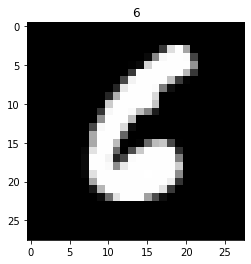

In [ ]:
# data 탐색

# 훈련용데이터의 길이만큼의 숫자 중에 랜덤한 숫자 하나 뽑아와서
index = np.random.randint(len(train_data))

# 해당하는 숫자가 있는 train_data의 데이터를 img2라는 변수에 넣음
img2 = train_data[index]

plt.imshow(img2, 'gray')
plt.title(train_label[index])
plt.show()

# 내가 만든 그림으로 확인하기

그림판으로 숫자하나 그려서 저장
그림판 크기 => (28,28)

In [ ]:
import os
from PIL import Image
from google.colab import files

upload = files.upload()

Saving number.png to number.png


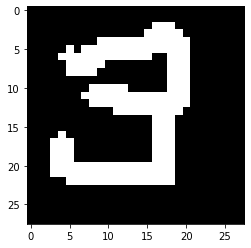

In [ ]:
# 경로 설정
dir = os.getcwd()
imgPath = os.path.join(dir,'number.png')

# 파일 읽기
nowImg = Image.open(imgPath)
# print(nowImg)

# 28 X 28로 사이즈 변환
nowImg = nowImg.resize((28,28))
myImg = np.asarray(nowImg) # array형식으로 형변환

# 컬러이미지의 경우 RGB 평균값으로 바꾸기
try:
  myImg = np.mean(myImg, axis=2)
except:
  pass

# 이미지의 RGB평균을 절대값으로 계산해서 다시 이미지에 넣는 작업
myImg = np.abs(255 - myImg)
myImg = myImg.astype(np.float32) / 255
plt.imshow(myImg,'gray')
plt.show()








In [ ]:
# shape의 변경해서 학습된 model과 비교
myImg = np.reshape(myImg, (1,28,28))
print(model.predict(myImg))
print("Model이 예측한 갑은 {} !!".format(np.argmax(model.predict(myImg))))

1/1 [==============================] - 0s 16ms/step
[[0.0000000e+00 3.9318794e-28 5.8931136e-09 4.0759937e-06 0.0000000e+00
  9.9848926e-01 7.0843569e-21 1.5066697e-03 2.8967258e-32 0.0000000e+00]]
1/1 [==============================] - 0s 20ms/step
Model이 예측한 갑은 5 !!
